### Our objective: robustify a given neural network 
0. Prepare for experiments (DONE)
1. Display the pattern how benign samples and adversarial samples being evalauted by PI (e.g., B->B->B->B, B->B->B->A). (DONE)
2. Identify the layer required further improvement ()
3. Robustify model ()
4. Evalaute effectiveness (whether robustified model truly enhance the robustness in terms of attack success rate Or PI indentification rate) ()

In [1]:
'''
0. Prepare for experiments 
'''
%matplotlib inline
import property_inference_interface
PI = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'num_of_LPs': 4,
    'size_of_train_set': 1000,
    'size_of_test_set': 100,
    'flatten': True, 
    'model_type': 'FC',
    'adv_attack': 'i_FGSM'
}

PI.set_meta_params(meta_params)
PI.print_meta_params()
PI.prepare_dataset()
PI.print_dataset_shape()

num_of_LPs           : 4
size_of_train_set    : 1000
size_of_test_set     : 100
flatten              : True
model_type           : FC
adv_attack           : i_FGSM
Train dataset
(1000, 784) (1000,)
Test dataset
(100, 784) (100,)


In [2]:
'''
0. Prepare for experiments 
'''
# PI.generate_model(num_of_epochs=15)
# PI.store_model('MNIST_CNN.pt')
PI.load_model('MNIST_FC.pt')

print('Evaluate accurancy: original')
PI.eval_model('train', on_robustified_model=False)
PI.eval_model('test', on_robustified_model=False)

Evaluate accurancy: original
Model ( train ) accurancy: 0.984
Model ( test ) accurancy: 0.99


//anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
//anaconda3/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


0.99

In [3]:
'''
0. Prepare for experiments 
'''
PI.generate_LPs()
(B_detect_ratio, A_detect_ratio), (B_LPs, A_LPs), (B_LPs_score, A_LPs_score) = PI.evaluate_algorithm_on_test_set(verbose=False)

# B: Benign (normal) samples within test dataset 
# B2: Benign (normal) samples within train dataset 
# A: Adversarial samples based on benign samples within test dataset 

Using TensorFlow backend.


(99, 4) (49, 4)
This indicates the portion of inputs to be judged as "benign"
[0.8989899  0.90909091 0.95959596 0.96969697] test dataset (benign)
[0.10204082 0.06122449 0.79591837 0.95918367] test dataset (adversarial)


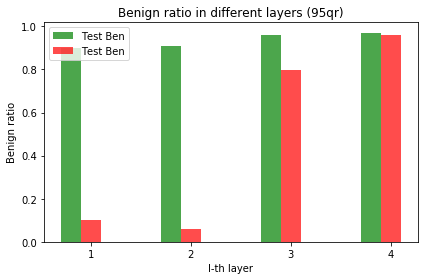

In [4]:
'''
1. Display the pattern how benign samples and adversarial samples being evalauted by PI (e.g., B->B->B->B, B->B->B->A).
'''
import matplotlib.pyplot as plt
import numpy as np

qr = '95'
BLPs, ALPs = np.array(B_LPs), np.array(A_LPs) 
print(BLPs.shape, ALPs.shape)

BLPs[BLPs=='benign'] = 1
BLPs[BLPs=='adversarial'] = 0
BLPs = BLPs.astype(np.int)
prob_BLPs = np.sum(BLPs, axis=0) / BLPs.shape[0]

ALPs[ALPs=='benign'] = 1
ALPs[ALPs=='adversarial'] = 0
ALPs = ALPs.astype(np.int)
prob_ALPs = np.sum(ALPs, axis=0) / ALPs.shape[0]

print('This indicates the portion of inputs to be judged as "benign"')
print(prob_BLPs, 'test dataset (benign)')
print(prob_ALPs, 'test dataset (adversarial)')

# create plot
fig, ax = plt.subplots()
num_of_layers = 4
index = np.arange(num_of_layers)
bar_width, opacity = 0.2, 0.7

rects1 = plt.bar(index, prob_BLPs, bar_width, alpha=opacity, color='g', label='Test Ben')
rects2 = plt.bar(index + bar_width, prob_ALPs, bar_width, alpha=opacity, color='r', label='Test Ben')

plt.xlabel('I-th layer')
plt.ylabel('Benign ratio')
plt.title('Benign ratio in different layers ('+qr+'qr)')
plt.xticks(index + bar_width, ('1', '2', '3', '4'))
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
'''
2. Identify the layer required further improvement (PENDING)
'''
# func (for automatically locate which layer should be further improved)

'\n2. Identify the layer required further improvement (PENDING)\n'

In [6]:
'''
3. Robustify model 
let's say it's the 3
'''
# # interface.generate_model(num_of_epochs=15)
# interface.load_model('MNIST_CNN.pt')
# # interface.store_model('MNIST_CNN.pt')

# interface.generate_robustified_model()
# print('Display the architecture: original')
# print(interface.model)
# print('Display the architecture: robustified')
# print(interface.robustified_model)
# print('Evaluate accurancy: original')

# interface.eval_model('train', on_robustified_model=False)
# interface.eval_model('test', on_robustified_model=False)
# print('Evaluate accurancy: robustified')
# interface.eval_model('train', on_robustified_model=True)
# interface.eval_model('test', on_robustified_model=True)

'\n3. Robustify model \n'